# Basic two-objective sub-set selection optomization

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from mcsss import MultiCriteriaSubSetSolver
import matplotlib.pyplot as plt
import numpy as np

## Create a toy problem to solve

In [20]:
# create the actual problem to be solved
np.random.seed(1)
n_items = 500
x1 = np.random.uniform(0,1,n_items)
x2 = np.random.uniform(0,1,n_items)

obj1 = ('Max','random gaus 1',lambda x:np.sum(x1[x]))
obj2 = ('Max','random gaus 2',lambda x:np.sum(x2[x]))
objectives = [
    obj1,
    obj2
]

mcsss = MultiCriteriaSubSetSolver(
    objective_functions=objectives,
    ids=[f'id_{i+1}' for i in range(n_items)],
)

## Solve

NSGA-II:   0%|          | 0.00/500 [00:00<?, ?generation/s]

Greedy Selection Init:   0%|          | 0/100 [00:00<?, ?it/s]

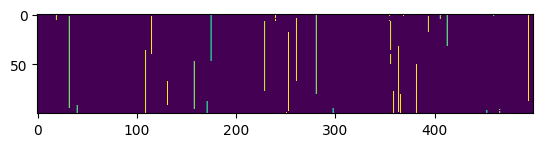

In [21]:
k = 50 # pick 50
res = mcsss.solve(n_max = k,pop_size=100,n_gens=500) # run the optomizer
F = res.F * np.array([-1,-1]) # the optomizer does minimization, so to maximize we multiply by -1

In [ ]:
historical_x = []
historical_f = []
generation = []
for i,e in enumerate(res.history):
    for opt in e.opt:
        historical_x.append(opt.X)
        historical_f.append(opt.F)
        generation.append(i)

X = np.vstack(historical_x)
F = np.vstack(historical_f)
F = F * np.array([-1,-1])
X.shape,F.shape

((4997, 100), (4997, 2))

## Draw the solutions space

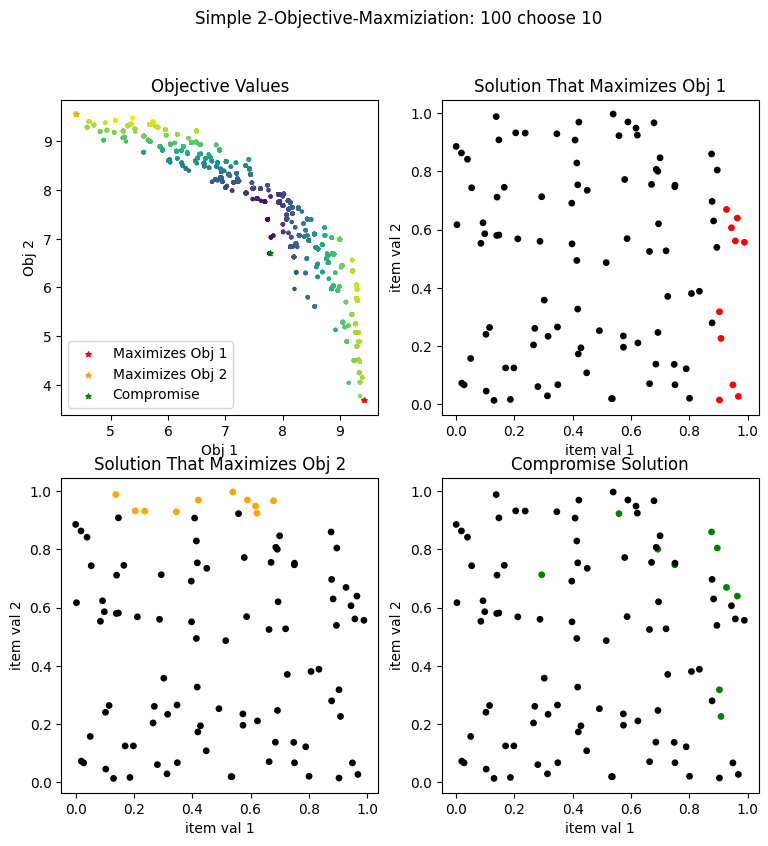

In [ ]:
from pymoo.decomposition.aasf import AASF
dm = AASF(eps=0.0, beta=5)
compromise = np.argmin(dm(F, weights=[0.5,0.5]))

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2,figsize=(9, 9))

ax0.set_title('Objective Values')
ax0.scatter(F[:,0],F[:,1],s=5,c=dm(F, weights=[0.5,0.5]))

obj_1_max_i = np.argmax(F[:,0])
obj_2_max_i = np.argmax(F[:,1])

ax0.scatter(F[obj_1_max_i,0],F[obj_1_max_i,1],s=15,color='red',marker='*',label='Maximizes Obj 1')
ax0.scatter(F[obj_2_max_i,0],F[obj_2_max_i,1],s=15,color='orange',marker='*',label='Maximizes Obj 2')
ax0.scatter(F[compromise,0],F[compromise,1],s=15,color='green',marker='*',label='Compromise')
ax0.legend(loc='lower left')

ax0.set_xlabel('Obj 1')
ax0.set_ylabel('Obj 2')

obj1_colors = ['red' if x else 'k' for x in X[np.argmax(F[:,0]),:]]
ax1.scatter(x1,x2,s=15,c=obj1_colors)
ax1.set_xlabel('item val 1')
ax1.set_ylabel('item val 2')
ax1.set_title('Solution That Maximizes Obj 1')

obj2_colors = ['orange' if x else 'k' for x in X[np.argmax(F[:,1]),:]]
ax2.scatter(x1,x2,s=15,c=obj2_colors)
ax2.set_xlabel('item val 1')
ax2.set_ylabel('item val 2')
ax2.set_title('Solution That Maximizes Obj 2')

obj3_colors = ['green' if x else 'k' for x in X[compromise,:]]
ax3.scatter(x1,x2,s=15,c=obj3_colors)
ax3.set_xlabel('item val 1')
ax3.set_ylabel('item val 2')
ax3.set_title('Compromise Solution')

fig.suptitle(f'Simple 2-Objective-Maxmiziation: {n_items} choose {k}')
plt.show()